In [1]:
%run 1st_Functions.ipynb

In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt


In [3]:
# Connect to DB
conn, cursor= connect()

import pandas
# sql = """ SELECT * from players where field_position in ('GK') """
sql = f"SELECT * from players"

data = pandas.read_sql(sql, con=conn)
# conn.commit()

# Disconnect from DB
disconnect(conn, cursor)

# data = create_players_dataframes(data, columns_to_keep)
# display(data)
display(data.shape)
# goal_keepers_data = create_fifa_players_dataset(goal_keepers_data, './resources/', 'goal_keepers.csv')

<connection object at 0x000001BE0B1F9040; dsn: 'user=postgres password=xxx dbname=fifa-players-prediction host=fifa-players-prediction.c05nwfquwc6t.us-east-1.rds.amazonaws.com port=5432', closed: 0>
Connected!


(18147, 88)

## Data structure
|columns|rows|
|--|--|
|88|18159|

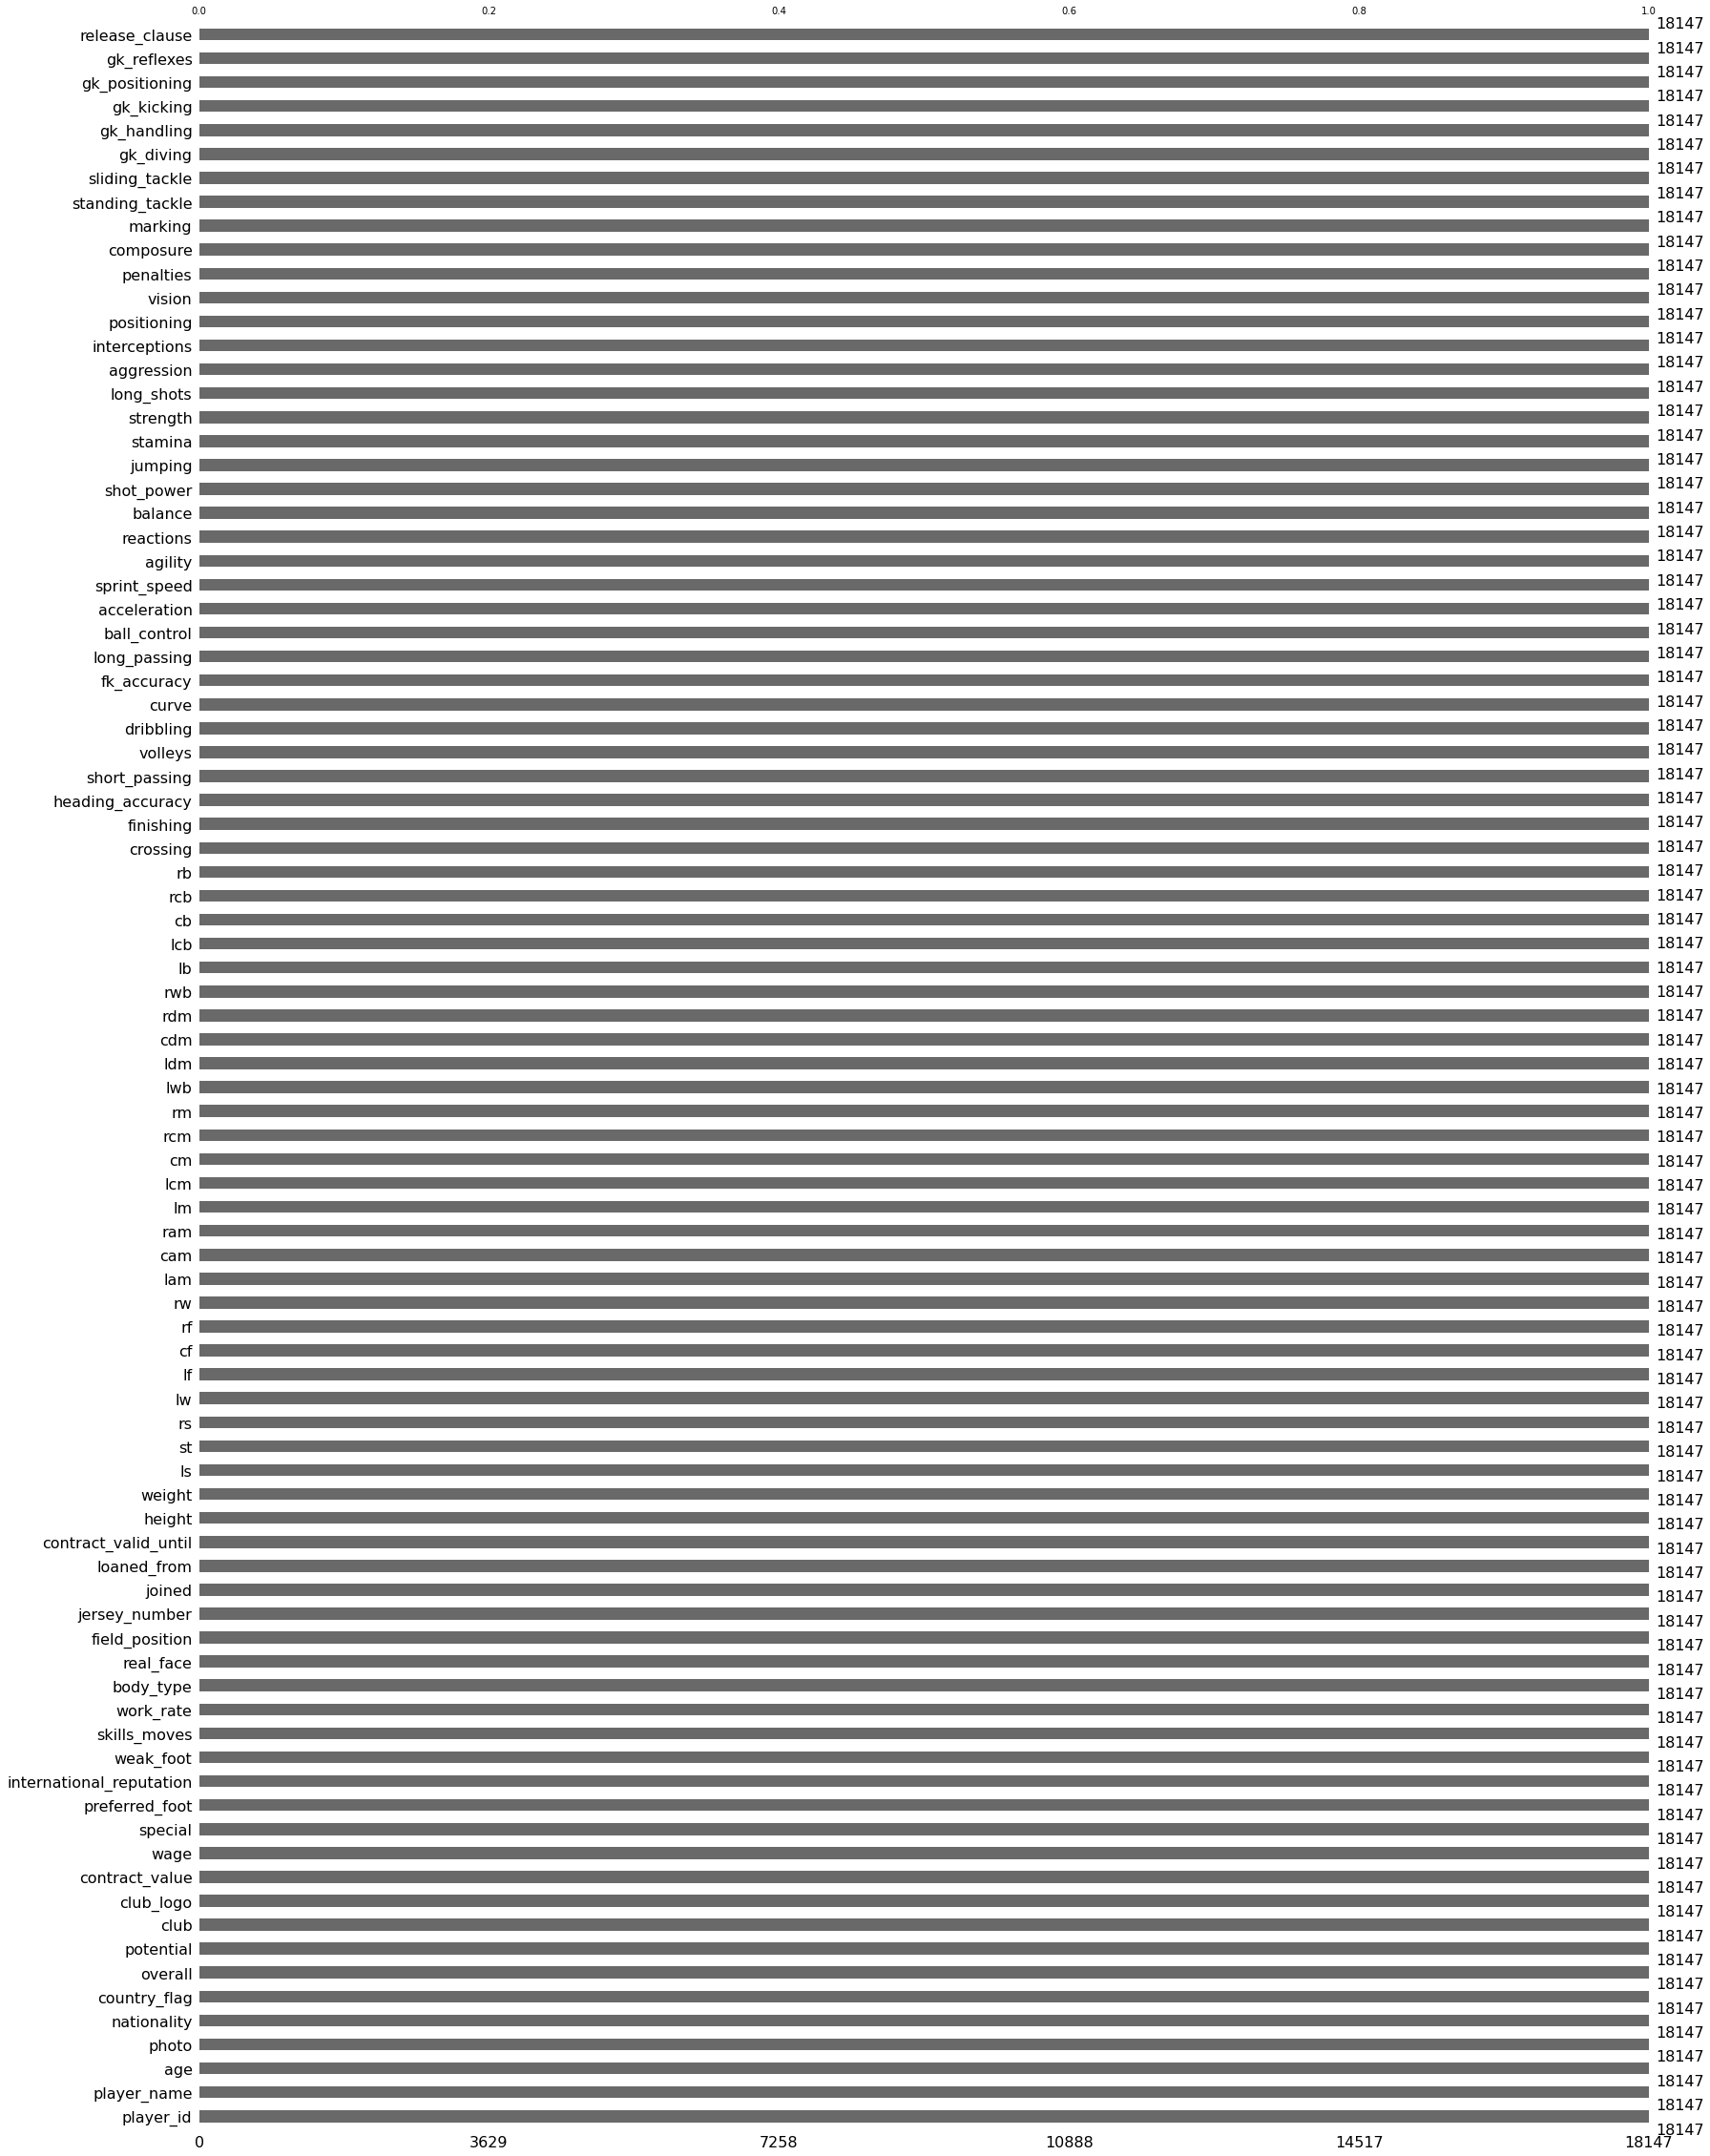

In [4]:
plot_count = 1
column_groups = np.array_split(data.columns, plot_count)

for columns in column_groups:
    msno.bar(data[columns])
    
    plt.tight_layout()
    # save graph
    loc = "./images/data_post_etl.jpg"
    plt.savefig(loc)
    plt.show()
    plt.close()
    

In [5]:
print(data.shape)
# display(data.head())
data.info()

(18147, 88)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_id                 18147 non-null  int64  
 1   player_name               18147 non-null  object 
 2   age                       18147 non-null  float64
 3   photo                     18147 non-null  object 
 4   nationality               18147 non-null  object 
 5   country_flag              18147 non-null  object 
 6   overall                   18147 non-null  float64
 7   potential                 18147 non-null  float64
 8   club                      18147 non-null  object 
 9   club_logo                 18147 non-null  object 
 10  contract_value            18147 non-null  object 
 11  wage                      18147 non-null  object 
 12  special                   18147 non-null  object 
 13  preferred_foot            18147 non-null  object 

In [6]:
data.columns


Index(['player_id', 'player_name', 'age', 'photo', 'nationality',
       'country_flag', 'overall', 'potential', 'club', 'club_logo',
       'contract_value', 'wage', 'special', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skills_moves', 'work_rate',
       'body_type', 'real_face', 'field_position', 'jersey_number', 'joined',
       'loaned_from', 'contract_valid_until', 'height', 'weight', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marki

In [7]:
data.drop(['ls', 'st', 'player_id',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'], axis =1, inplace = True)

#height Column
def clean_height(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])
        j=int(l[1])
        s=((i*12)+j)/12
    return(s)


data['height'] = data['height'].apply(clean_height).astype('int64')
data['height'].fillna((data['height'].mean()), inplace = True)

#weight Column
def clean_weight(x):
    
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

data['weight'] = data['weight'].apply(clean_weight).astype('int64')
data['weight'].fillna((data['weight'].mean()), inplace = True)

data.columns

Index(['player_name', 'age', 'photo', 'nationality', 'country_flag', 'overall',
       'potential', 'club', 'club_logo', 'contract_value', 'wage', 'special',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skills_moves', 'work_rate', 'body_type', 'real_face', 'field_position',
       'jersey_number', 'joined', 'loaned_from', 'contract_valid_until',
       'height', 'weight', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'fk_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_positioning', 'gk_reflexes', 'release_clause'],
      dtype='object')

In [8]:
print(f'in the dataset there are {len(data.columns)} columns and {len(data)} rows')

in the dataset there are 61 columns and 18147 rows


In [9]:
data.rename(columns ={'overall': 'overall_rating'}, inplace = True)

In [10]:
data


,player_name,age,photo,nationality,country_flag,overall_rating,potential,club,club_logo,contract_value,...,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,release_clause
0,L. Messi,31.0,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94.0,94.0,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,...,96,33,28,26,6,11,15,14,8,€226.5M
1,Cristiano Ronaldo,33.0,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94.0,94.0,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,...,95,28,31,23,7,11,15,14,11,€127.1M
2,Neymar Jr,26.0,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92.0,93.0,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,...,94,27,24,33,9,9,15,15,11,€228.1M
3,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91.0,93.0,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,...,68,15,21,13,90,85,87,88,94,€138.6M
4,K. De Bruyne,27.0,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,92.0,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,...,88,68,58,51,15,13,5,10,13,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18142,J. Lundstram,19.0,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47.0,65.0,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,...,45,40,48,47,10,13,7,8,9,€143K
18143,N. Christoffersson,19.0,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47.0,63.0,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,...,42,22,15,19,10,9,9,5,12,€113K
18144,B. Worman,16.0,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47.0,67.0,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,€60K,...,41,32,13,11,6,5,10,6,13,€165K
18145,D. Walker-Rice,17.0,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47.0,66.0,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,...,46,20,25,27,14,6,14,8,9,€143K
